In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Importing warnings to ignore module warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\Dell\Downloads\default of credit card clients (1).xls')

In [3]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [9]:
df.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [10]:
new_names =dict(zip(df.columns, df.iloc[0]))
df = df.rename(columns=new_names)

In [11]:
df = df.drop(0)

In [12]:
df.dtypes

ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
import pandas as pd

# Define columns to exclude from conversion
exclude_columns = ['SEX', 'default payment next month']

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column should be excluded
    if column not in exclude_columns:
        # Clean non-integer values
        df[column] = df[column].astype(str)

        df[column] = df[column].str.replace('[^\d.]', '')  # Remove non-numeric characters
        
         # Convert column to integers
        df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

# Convert 'SEX' column to integers
df['SEX'] = df['SEX'].astype(int)

# Convert 'default payment next month' column to integers
df['default payment next month'] = df['default payment next month'].astype(int)

# Drop rows with NaN values (if needed)
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int16
 1   LIMIT_BAL                   30000 non-null  int32
 2   SEX                         30000 non-null  int32
 3   EDUCATION                   30000 non-null  int8 
 4   MARRIAGE                    30000 non-null  int8 
 5   AGE                         30000 non-null  int8 
 6   PAY_0                       30000 non-null  int8 
 7   PAY_2                       30000 non-null  int8 
 8   PAY_3                       30000 non-null  int8 
 9   PAY_4                       30000 non-null  int8 
 10  PAY_5                       30000 non-null  int8 
 11  PAY_6                       30000 non-null  int8 
 12  BILL_AMT1                   30000 non-null  int32
 13  BILL_AMT2                   30000 non-null  int32
 14  BILL_A

In [16]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No Null values are present in the dataset.

# Handling Outliers.

<Axes: ylabel='default payment next month'>

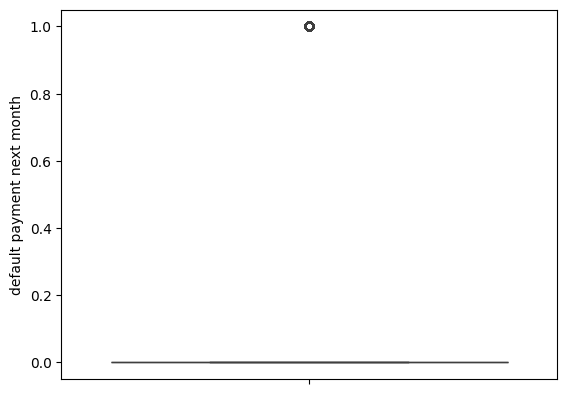

In [17]:
sns.boxplot(df['default payment next month'])

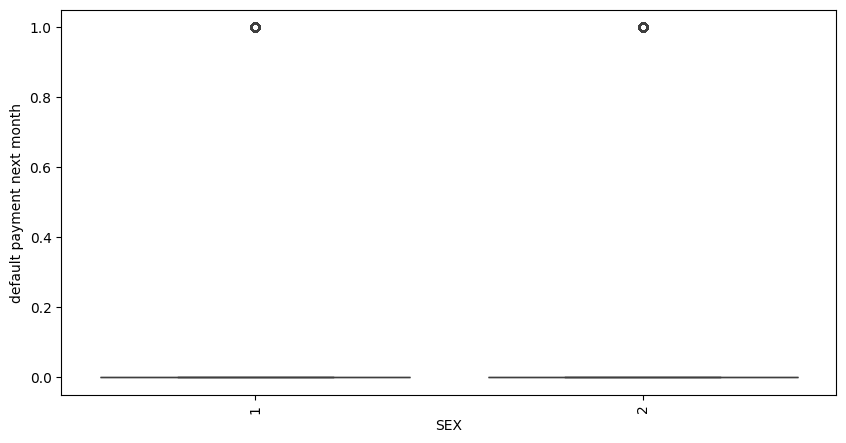

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='SEX',y='default payment next month')
plt.xticks(rotation=90)
plt.show()

In [19]:
def replacing_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr

        median = df[col].median()

        df[col] = np.where((df[col] <= lower) & (df[col] >= upper), median, df[col])

    return df

In [20]:
columns_with_outliers = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
                         'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                         'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                         'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                         'default payment next month']

In [21]:
df = replacing_outliers(df, columns_with_outliers)

# Handling Skewness

In [22]:
from scipy.stats import skew

ID
0.0


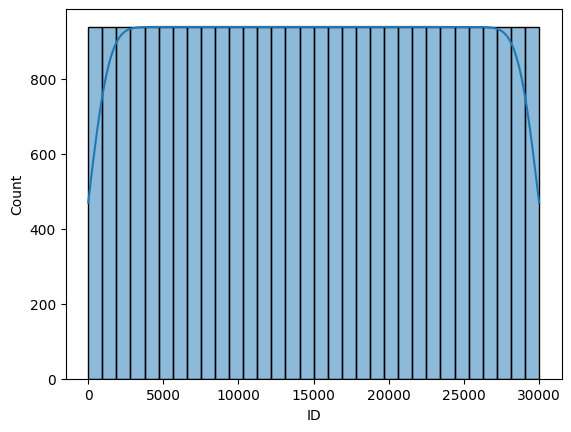

LIMIT_BAL
0.9928173164820109


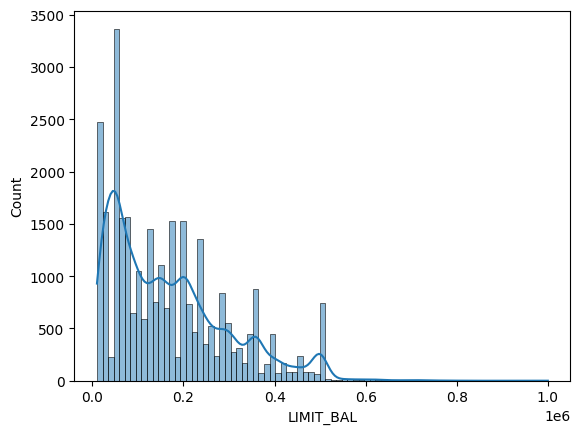

SEX
-0.4241622176497638


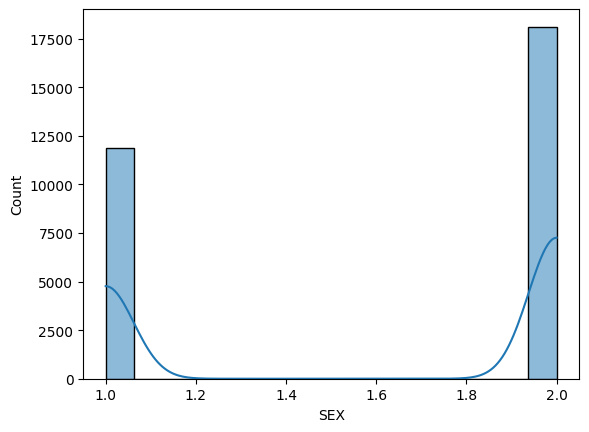

EDUCATION
0.9709234992917573


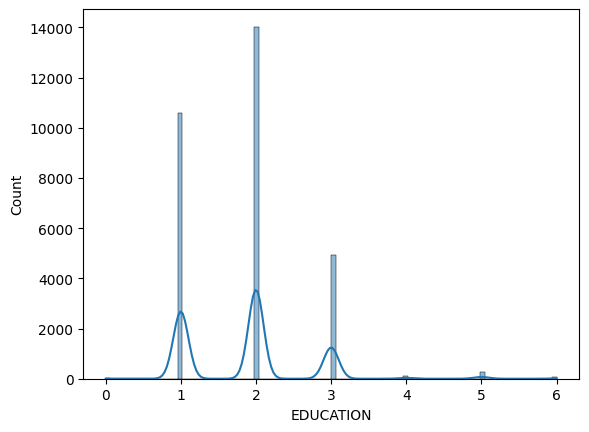

MARRIAGE
-0.01874074391724496


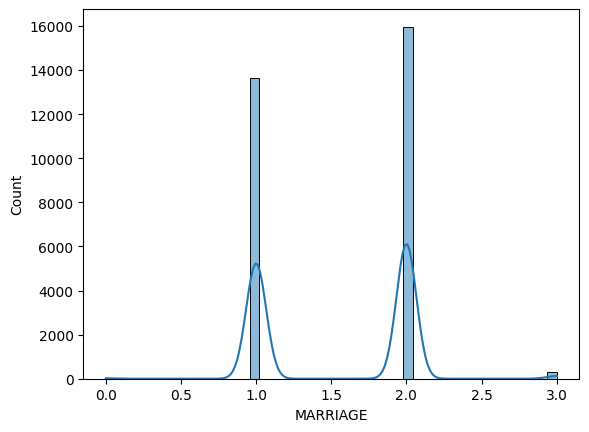

AGE
0.7322092559811012


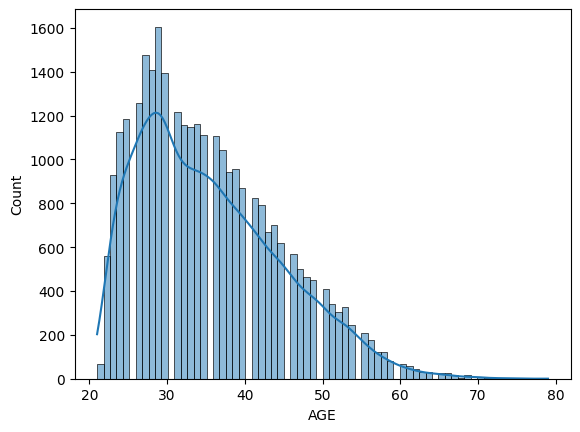

PAY_0
0.7319383276538349


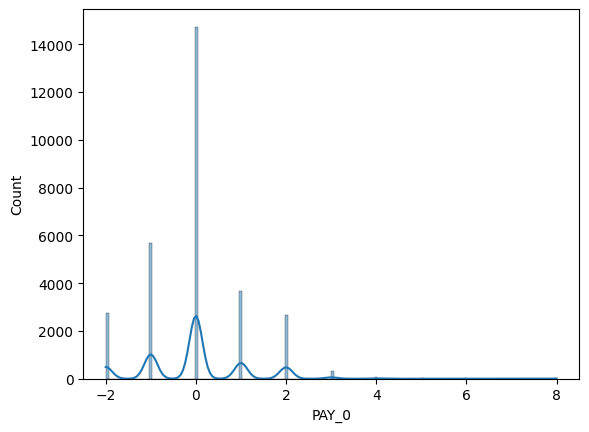

PAY_2
0.7905254934023821


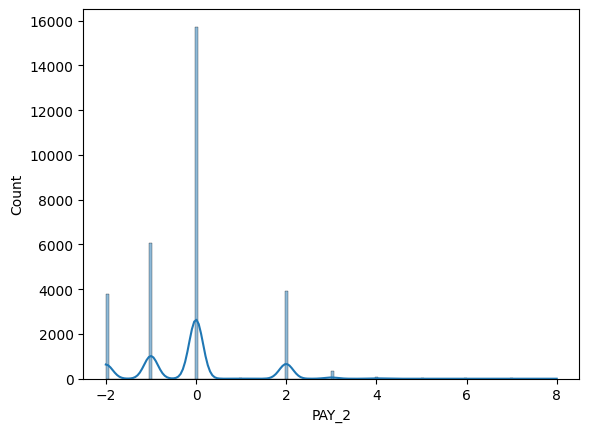

PAY_3
0.8406397922714622


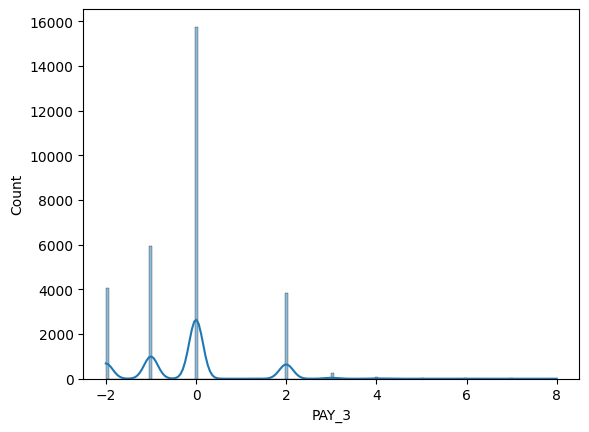

PAY_4
0.9995794311396099


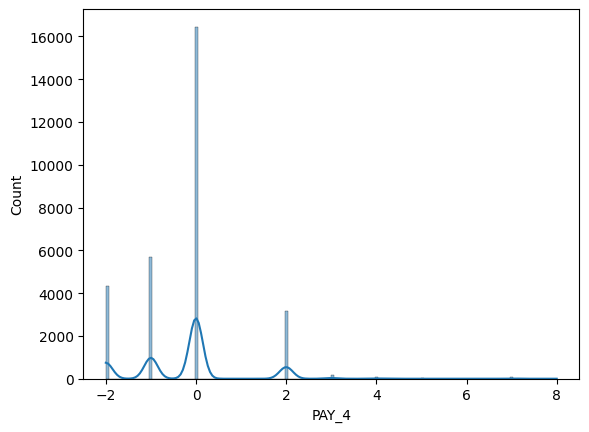

PAY_5
1.0081466145548093


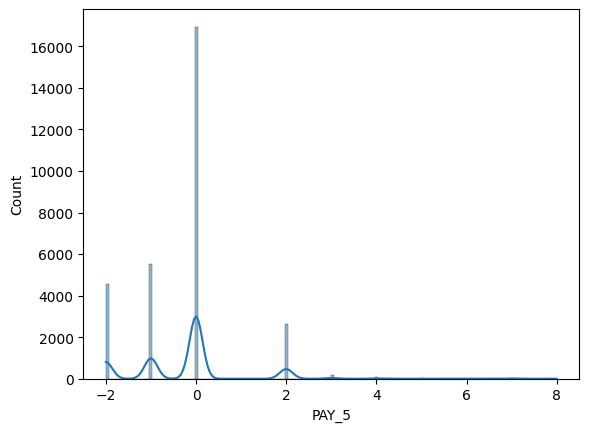

PAY_6
0.947981989427411


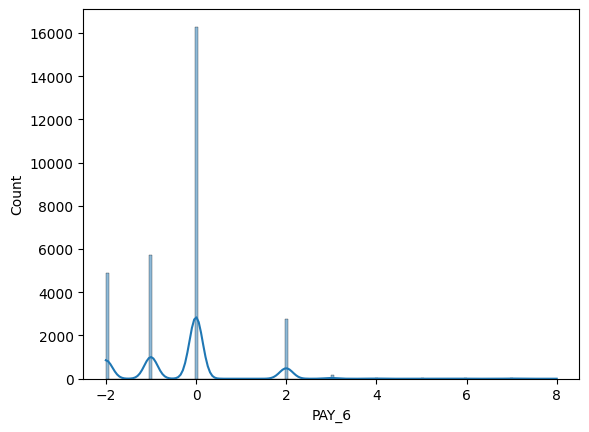

BILL_AMT1
2.6637278271222136


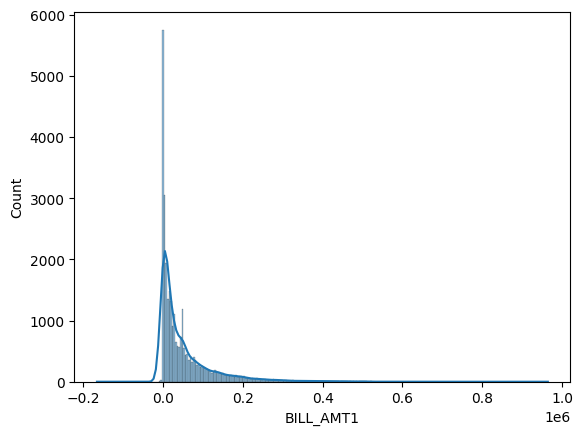

BILL_AMT2
2.7050855904869455


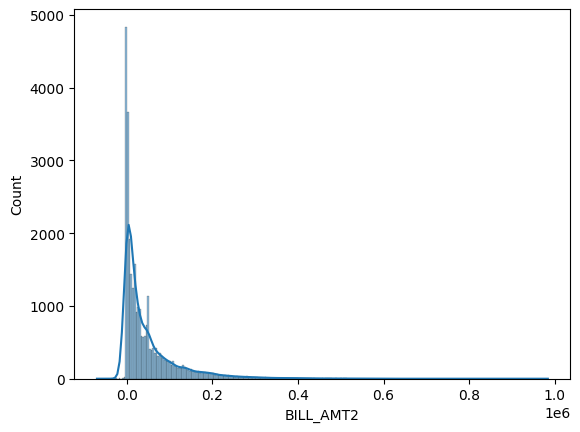

BILL_AMT3
3.087675652554038


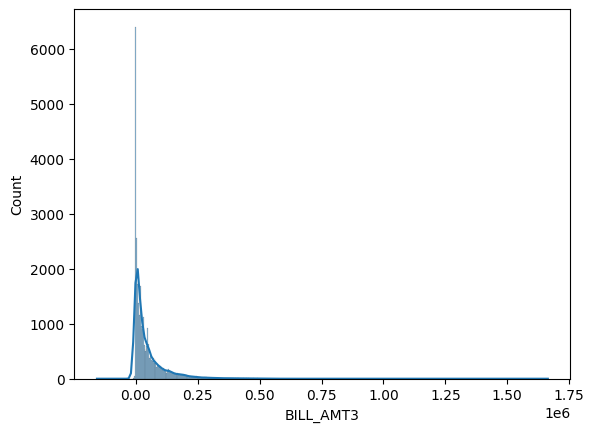

BILL_AMT4
2.821824190578528


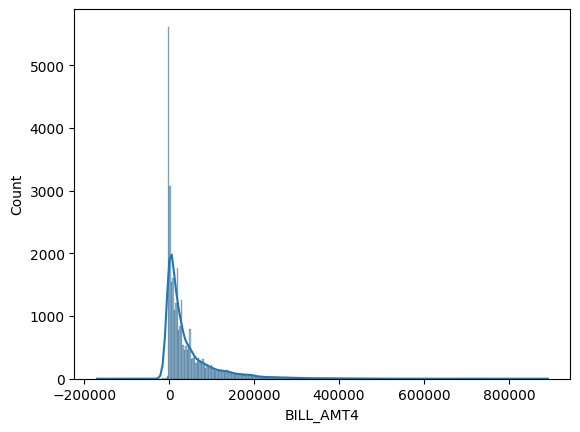

BILL_AMT5
2.876236045711996


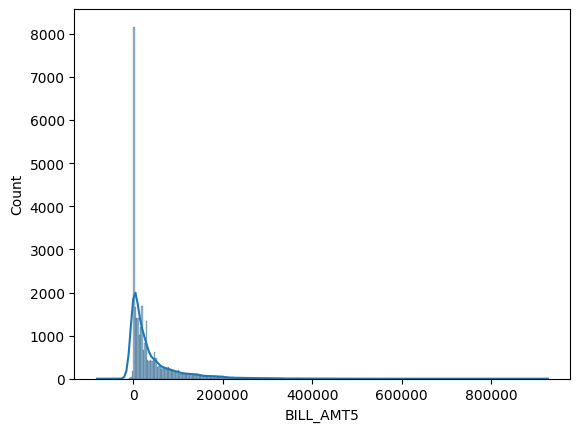

BILL_AMT6
2.846502241454702


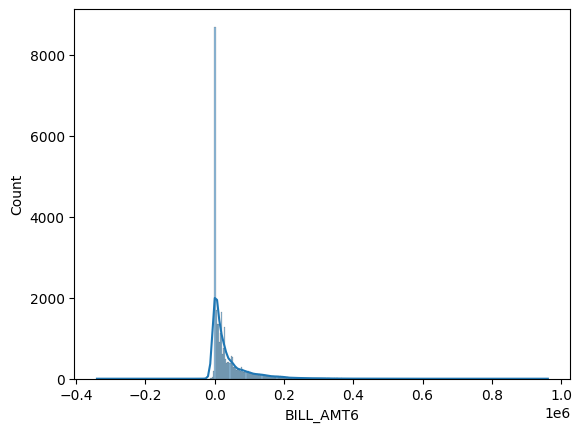

PAY_AMT1
14.667630904439925


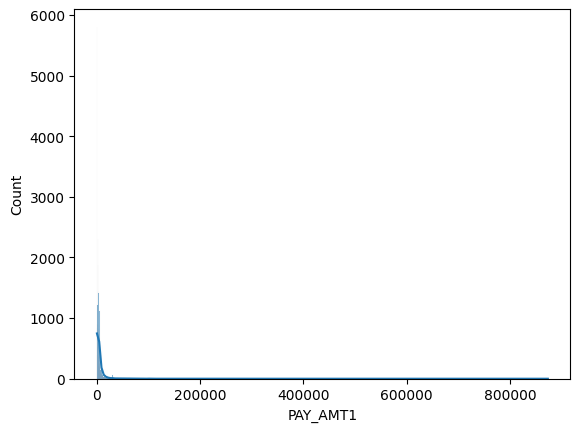

PAY_AMT2
30.452294738147945


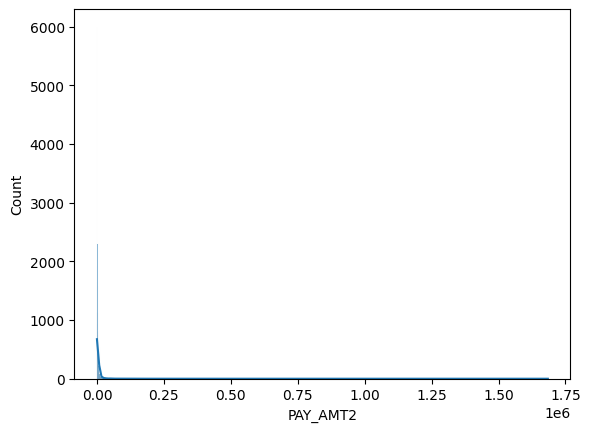

PAY_AMT3
17.215774591401207


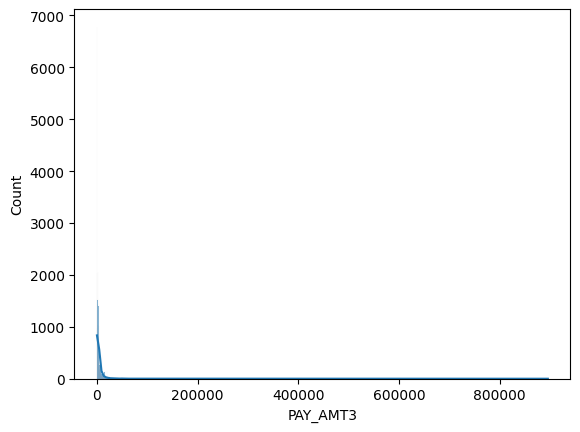

PAY_AMT4
12.904339565339363


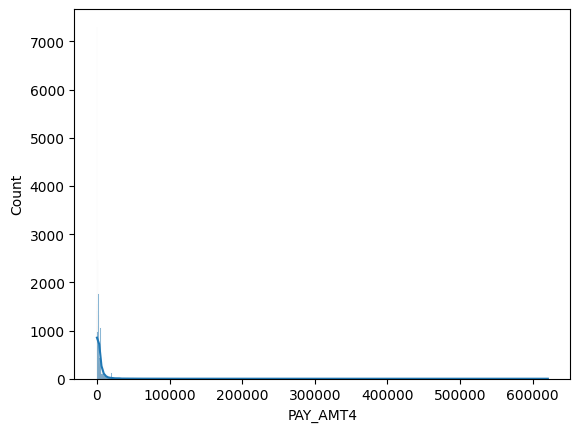

PAY_AMT5
11.126860673593654


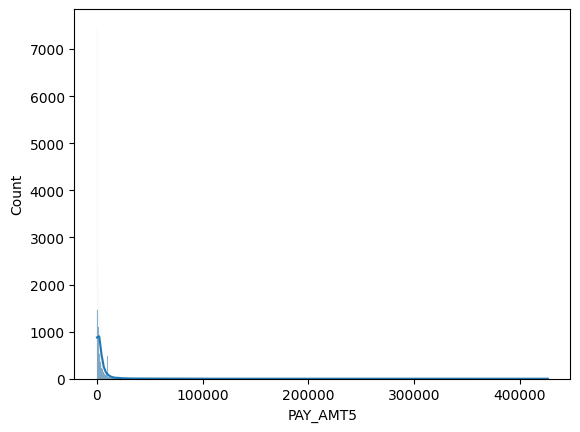

PAY_AMT6
10.640195281288497


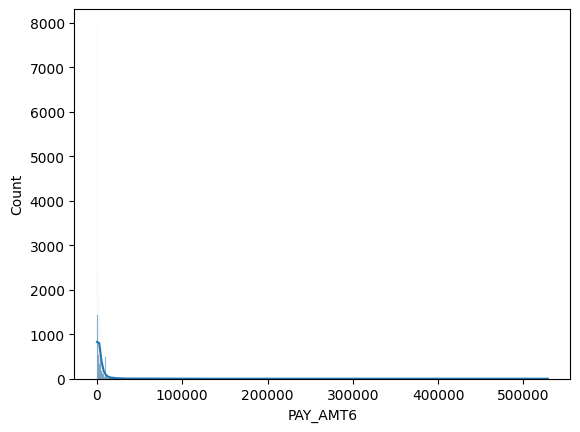

default payment next month
1.3434367747652611


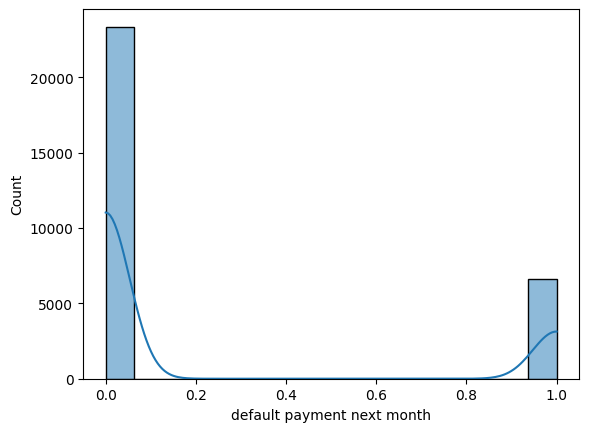

In [23]:
for col in df:
    print(col)
    print(skew(df[col]))

    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.show()

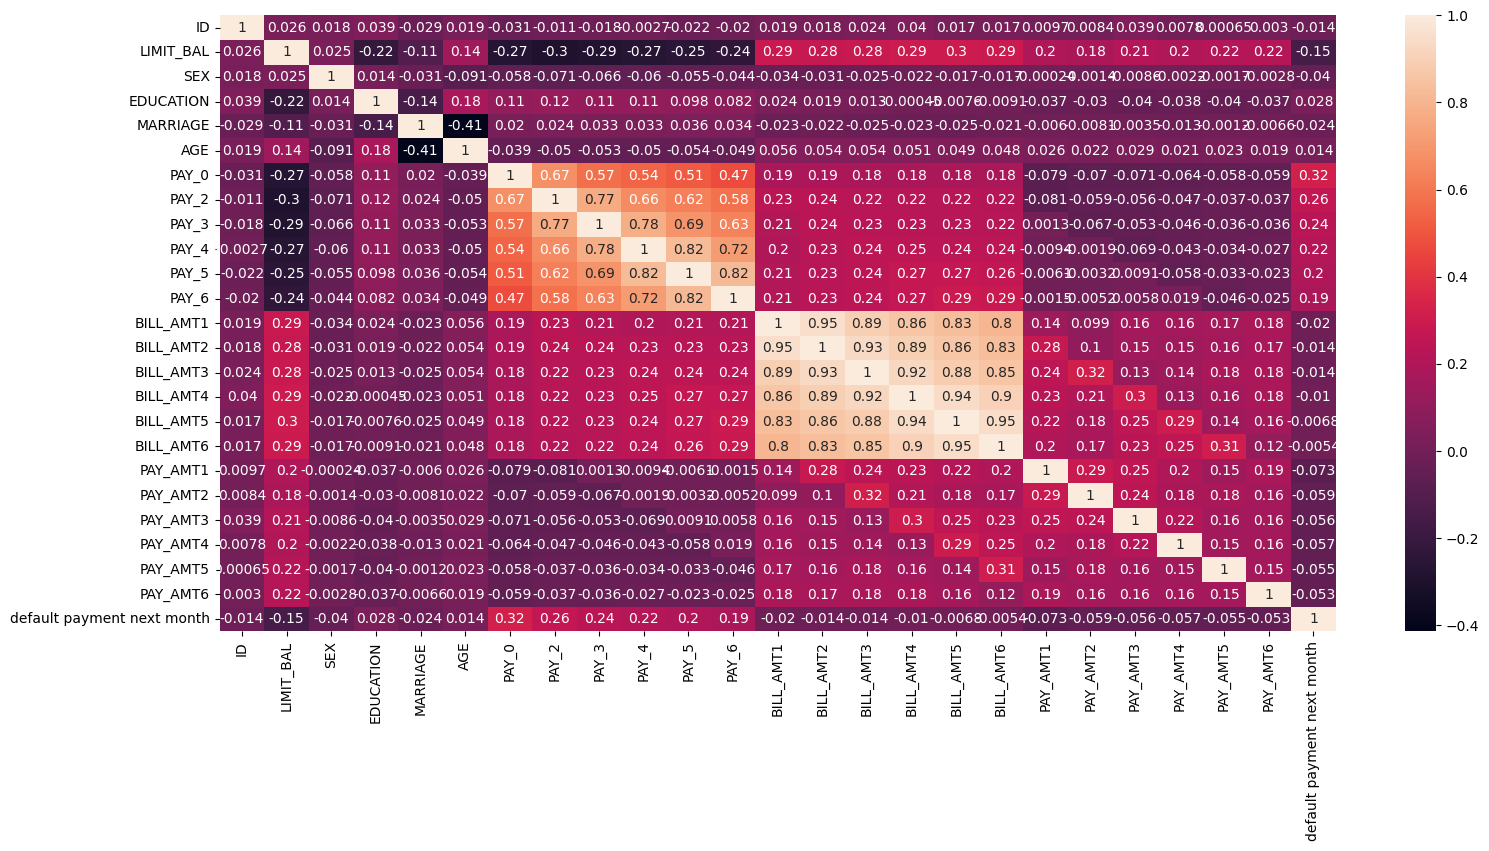

In [24]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
df = df.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [26]:
df['PAY_AMT6'] = np.sqrt(df['PAY_AMT6'])

In [27]:
skew(df['PAY_AMT6'])

3.3757824235806453

In [28]:
df['PAY_AMT6'] = np.sqrt(df['PAY_AMT6'])

In [29]:
skew(df['PAY_AMT6'])

0.2507607178308516

In [30]:
df['PAY_AMT5'] = np.sqrt(df['PAY_AMT5'])

In [31]:
skew(df['PAY_AMT5'])

3.1487970642453234

In [32]:
df['PAY_AMT5'] = np.sqrt(df['PAY_AMT5'])

In [33]:
skew(df['PAY_AMT5'])

0.1254669684337455

In [34]:
df['PAY_AMT4'] = np.sqrt(df['PAY_AMT4'])

In [35]:
skew(df['PAY_AMT4'])

3.207240434520187

In [36]:
df['PAY_AMT4'] = np.sqrt(df['PAY_AMT4'])

In [37]:
skew(df['PAY_AMT4'])

0.14222753024356508

In [38]:
df['PAY_AMT3'] = np.sqrt(df['PAY_AMT3'])

In [39]:
skew(df['PAY_AMT3'])

3.4005853778608484

In [40]:
df['PAY_AMT3'] = np.sqrt(df['PAY_AMT3'])

In [41]:
skew(df['PAY_AMT3'])

0.07941888996585131

In [42]:
df['PAY_AMT2'] = np.sqrt(df['PAY_AMT2'])

In [43]:
skew(df['PAY_AMT2'])

4.028129142050677

In [44]:
df['PAY_AMT2'] = np.sqrt(df['PAY_AMT2'])

In [45]:
skew(df['PAY_AMT2'])

0.02021223746610905

In [46]:
df['PAY_AMT1'] = np.sqrt(df['PAY_AMT1'])

In [47]:
skew(df['PAY_AMT1'])

3.0756093198534864

In [48]:
df['AGE'] = np.sqrt(df['AGE'])

In [49]:
skew(df['AGE'])

0.47921836612853996

In [50]:
df['EDUCATION'] = np.sqrt(df['EDUCATION'])

In [51]:
skew(df['EDUCATION'])

0.3224960371912347

In [52]:
df['LIMIT_BAL'] = np.sqrt(df['LIMIT_BAL'])

In [53]:
skew(df['LIMIT_BAL'])

0.27664154691282344

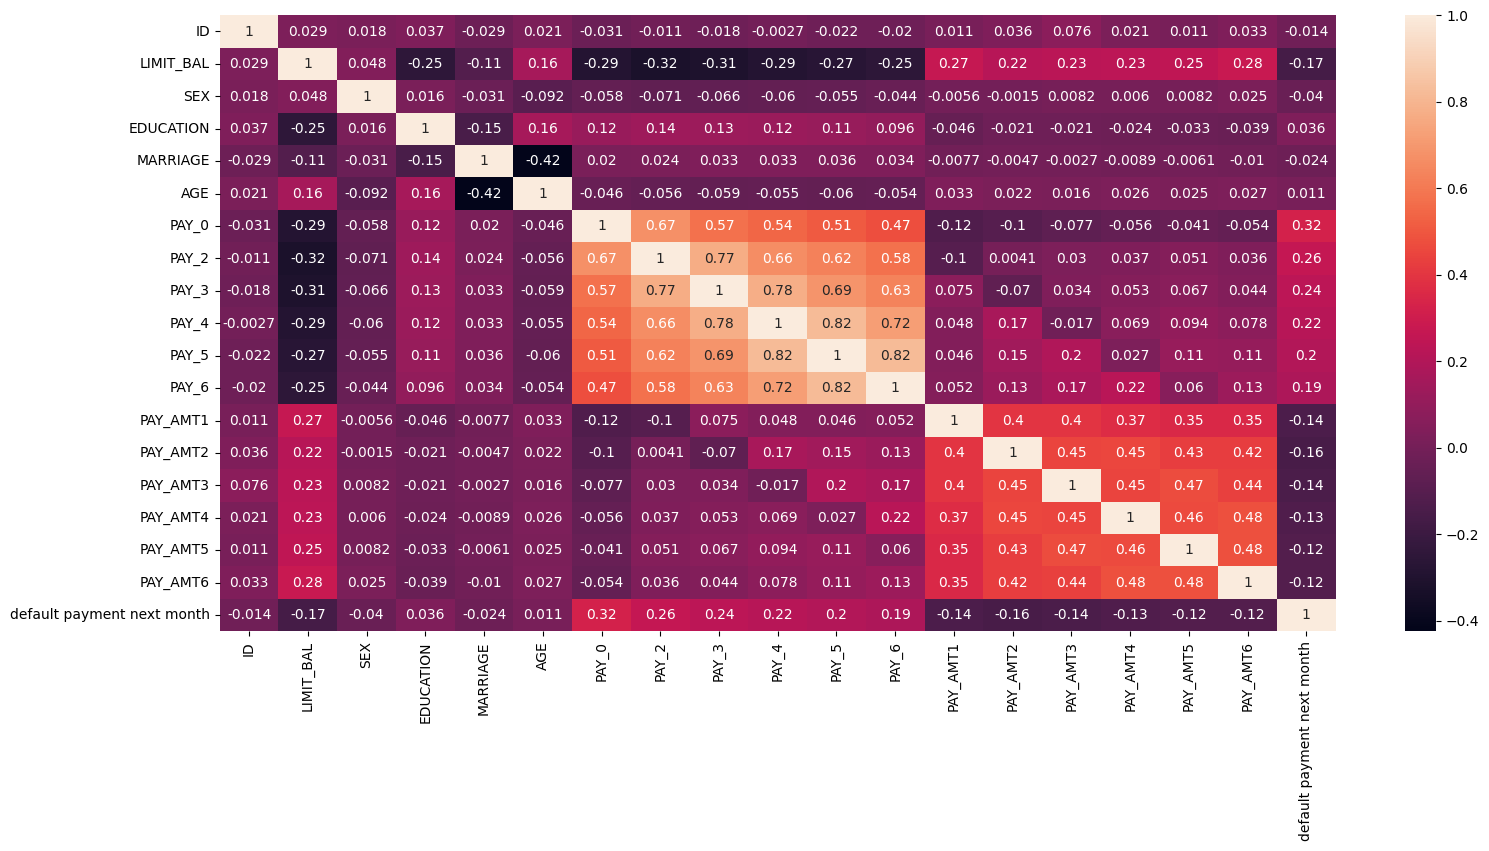

In [54]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
X = df.drop(columns='default payment next month')

y = df['default payment next month']

# Spliting data on Train and Test.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 0)

In [58]:
print(X_train.shape)
print(X_test.shape)

(27000, 18)
(3000, 18)


In [59]:
y_train.value_counts()

default payment next month
0.0    21004
1.0     5996
Name: count, dtype: int64

In [60]:
y_test.value_counts()

default payment next month
0.0    2360
1.0     640
Name: count, dtype: int64

In [61]:
# standardizing the independent variables

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

# Random Forest Classifier

In [ ]:
# creating instance of random forest and fitting data

rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting for both train and test

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [ ]:
# checking predicted values for test set

y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train))
print('The precision of training set = ',precision_score(y_train,y_pred_train,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.9999629629629629
The precision of training set =  [0.99995239 1.        ]
The recall of training set =  [1.         0.99983322]
The f1 score of training set =  [0.9999762 0.9999166]
The confusion matrix of training set = 
 [[21004     0]
 [    1  5995]]


In [ ]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test))
print('The precision of test set = ',precision_score(y_test,y_pred_test,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.824
The precision of test set =  [0.8453997  0.66091954]
The recall of test set =  [0.95     0.359375]
The f1 score of test set =  [0.89465283 0.46558704]
The confusion matrix of test set = 
 [[2242  118]
 [ 410  230]]


* **Accuracy score for train set is 0.99 and acuuracy score for test set is 0.82. So, this means there is overfitting in our model.**

In [ ]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=pd.DataFrame(dict1,index=[0])

In [ ]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=pd.DataFrame(dict2,index=[0])

In [ ]:
# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(50,200,10,dtype='int64'))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(40,80,10,dtype='int64'))

# Max Features
max_features=['auto','log2']

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features':max_features}

In [ ]:
# Random search

rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 4,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

NameError: name 'rf_model' is not defined

In [ ]:
# checking the best estimator

rf_random.best_estimator_

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=40,
                       min_samples_split=90, n_estimators=80, random_state=0)

In [ ]:
# checking the best parameters

rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 90,
 'min_samples_leaf': 40,
 'max_features': 'log2',
 'max_depth': 20}

In [ ]:
# storing the best estimator in a variable

rf_optimal_model1=rf_random.best_estimator_

In [ ]:
# predicting on both train and test

y_pred_train2=rf_optimal_model1.predict(X_train)
y_pred_test2=rf_optimal_model1.predict(X_test)

In [ ]:
# looking the predicted values for test set

y_pred_test2

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.8248148148148148
The precision of training set =  [0.8421783  0.69658385]
The recall of training set =  [0.95348505 0.37408272]
The f1 score of training set =  [0.89438192 0.48676215]
The confusion matrix of training set = 
 [[20027   977]
 [ 3753  2243]]


In [ ]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.827
The precision of test set =  [0.84722746 0.67335244]
The recall of test set =  [0.95169492 0.3671875 ]
The f1 score of test set =  [0.89642786 0.4752275 ]
The confusion matrix of test set = 
 [[2246  114]
 [ 405  235]]


In [ ]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df.loc[len(training_df)] = dict1

In [ ]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Comments':'Reduced underfitting'}
test_df.loc[len(test_df)] = dict2

In [ ]:
# implementing XGBoost classifier

xgb_model=XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# predicting for both training and test set

y_pred_train3=xgb_model.predict(X_train)
y_pred_test3=xgb_model.predict(X_test)

In [ ]:
y_pred_test3

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train3))
print('The precision of training set = ',precision_score(y_train,y_pred_train3,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train3,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train3,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train3))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.8801851851851852
The precision of training set =  [0.88194833 0.86921637]
The recall of training set =  [0.97671872 0.54202802]
The f1 score of training set =  [0.92691743 0.66769389]
The confusion matrix of training set = 
 [[20515   489]
 [ 2746  3250]]


In [ ]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test3))
print('The precision of test set = ',precision_score(y_test,y_pred_test3,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test3,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test3,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test3))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.8153333333333334
The precision of test set =  [0.84544759 0.61139896]
The recall of test set =  [0.93644068 0.36875   ]
The f1 score of test set =  [0.88862083 0.46003899]
The confusion matrix of test set = 
 [[2210  150]
 [ 404  236]]


In [ ]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train3),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df.loc[len(training_df)] = dict1

In [ ]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test3),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df.loc[len(test_df)] = dict2

In [ ]:
# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# min childs weight
min_child_weight=list(np.linspace(10,20,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [ ]:
# Random search

xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  2],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_child_weight': [10],
                                        'n_estimators': [5, 7, 9, 11, 13],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=0, scoring='accuracy')

In [ ]:
# checking th ebest estimator

xgb_random.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# checking the best parameters

xgb_random.best_params_

{'subsample': 0.3,
 'n_estimators': 13,
 'min_child_weight': 10,
 'max_depth': 13,
 'learning_rate': 0.13,
 'gamma': 1}

In [ ]:
# storing the best estimator in a variable

xgb_optimal_model1=xgb_random.best_estimator_

In [ ]:
# predicting on both train and test

y_pred_train4=xgb_optimal_model1.predict(X_train)
y_pred_test4=xgb_optimal_model1.predict(X_test)

In [ ]:
# looking the predicted values for test set

y_pred_test4

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',round(accuracy_score(y_train,y_pred_train4),2))
print('The precision of training set = ',precision_score(y_train,y_pred_train4,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train4,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train4,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train4))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.82
The precision of training set =  [0.83719484 0.71980508]
The recall of training set =  [0.96167397 0.3448966 ]
The f1 score of training set =  [0.89512752 0.46634344]
The confusion matrix of training set = 
 [[20199   805]
 [ 3928  2068]]


In [ ]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',round(accuracy_score(y_test,y_pred_test4),2))
print('The precision of test set = ',precision_score(y_test,y_pred_test4,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test4,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test4,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test4))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.82
The precision of test set =  [0.83995544 0.68078176]
The recall of test set =  [0.95847458 0.3265625 ]
The f1 score of test set =  [0.89530972 0.44139388]
The confusion matrix of test set = 
 [[2262   98]
 [ 431  209]]


**After hyperparameter tuning using RandomSearch:**

* **Accuracy score for train set is 0.82 and acuuracy score for test set is 0.82.**

In [ ]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train4),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df.loc[len(training_df)] = dict1

In [ ]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test4),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Comments':'Best of all model'}
test_df.loc[len(test_df)] = dict2

### **Let's check training and test set values that has been obtained from our models.**

In [ ]:
# checking the training set values

training_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,1.00,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.82,"[[0.84, 0.7]]","[[0.95, 0.37]]","[[0.89, 0.49]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.88,"[[0.88, 0.87]]","[[0.98, 0.54]]","[[0.93, 0.67]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.82,"[[0.84, 0.72]]","[[0.96, 0.34]]","[[0.9, 0.47]]",Best of all model


In [ ]:
test_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,0.82,"[0.85, 0.66]","[0.95, 0.36]","[0.89, 0.47]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.83,"[[0.85, 0.67]]","[[0.95, 0.37]]","[[0.9, 0.48]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.82,"[[0.85, 0.61]]","[[0.94, 0.37]]","[[0.89, 0.46]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.82,"[[0.84, 0.68]]","[[0.96, 0.33]]","[[0.9, 0.44]]",Best of all model
